# 1. Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('white')
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_excel('cases_2021_train_processed_2.xlsx')
test_df = pd.read_excel('cases_2021_test_processed_unlabelled_2.xlsx')

# 2. Data investigation

In [3]:
print(f'number of rows in train_df: {train_df.shape[0]}, number of columns in train_df: {train_df.shape[1]}')
print(f'number of rows in test_df: {test_df.shape[0]}, number of columns in test_df: {test_df.shape[1]}')

number of rows in train_df: 17212, number of columns in train_df: 15
number of rows in test_df: 4304, number of columns in test_df: 14


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17212 entries, 0 to 17211
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   age                     17212 non-null  float64       
 1   sex                     17212 non-null  object        
 2   province                13591 non-null  object        
 3   country                 17212 non-null  object        
 4   latitude                17212 non-null  float64       
 5   longitude               17212 non-null  float64       
 6   date_confirmation       17212 non-null  datetime64[ns]
 7   chronic_disease_binary  17212 non-null  bool          
 8   Confirmed               17212 non-null  float64       
 9   Deaths                  17212 non-null  float64       
 10  Recovered               17212 non-null  float64       
 11  Active                  17212 non-null  float64       
 12  Incident_Rate           17212 non-null  float6

In [5]:
train_df.describe().round(2)

,age,latitude,longitude,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,17212.00,17212.00,17212.00,17212.00,17212.00,17212.00,17212.00,17212.00,17212.00
mean,37.92,15.53,87.78,753361.97,10575.75,703014.84,39771.38,985.08,1.33
std,18.67,5.67,18.46,294601.12,5296.79,274965.38,87197.65,527.18,0.42
min,0.00,-34.93,-123.10,193.00,1.00,183.00,1.00,0.77,0.05
25%,24.00,12.82,78.15,747288.00,12567.00,603746.00,15879.00,681.95,1.26
50%,35.00,13.12,80.28,886673.00,12719.00,858075.00,15879.00,1139.08,1.43
75%,51.00,16.20,86.40,886673.00,12719.00,858075.00,28267.00,1139.08,1.43
max,99.00,49.25,153.40,4611392.00,95052.00,2400727.00,4251829.00,13943.07,6.62


# 3. Data visualization

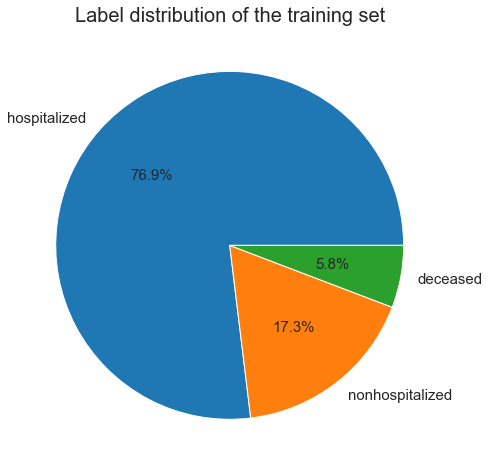

In [6]:
# label distribution
label = train_df['outcome_group']
label_freq = label.value_counts() / len(label)
plt.figure(figsize=(10, 8))
plt.pie(label_freq, labels=label_freq.index, autopct='%.1f%%', textprops={'fontsize': 15})
plt.title('Label distribution of the training set', fontsize=20)
plt.show()

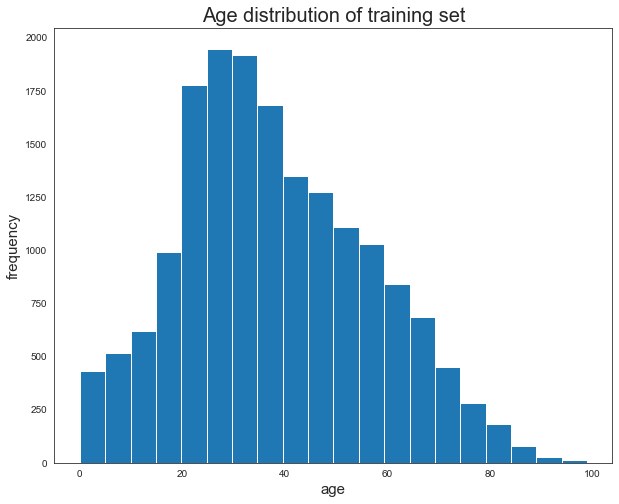

In [7]:
# age distribution

plt.figure(figsize=(10, 8))
plt.hist(train_df['age'], bins=20)
plt.xlabel('age', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.title('Age distribution of training set', fontsize=20)
plt.show()

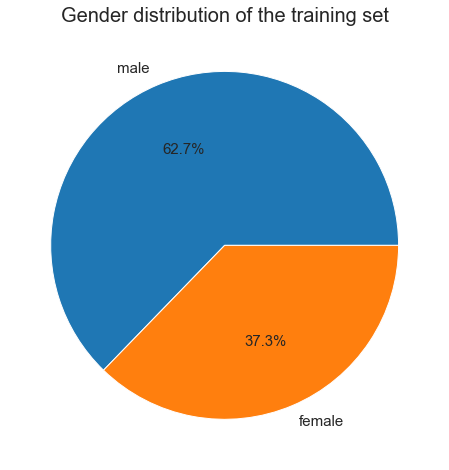

In [8]:
# gender distribution

gender_freq = train_df['sex'].value_counts() / len(label)
plt.figure(figsize=(10, 8))
plt.pie(gender_freq, labels=gender_freq.index, autopct='%.1f%%', textprops={'fontsize': 15})
plt.title('Gender distribution of the training set', fontsize=20)
plt.show()

# 4. Data Preprocessing

In [9]:
train_df = train_df.drop(columns=['province', 'chronic_disease_binary'])
test_df = test_df.drop(columns=['province', 'chronic_disease_binary'])

In [10]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df

,age,sex,country,latitude,longitude,date_confirmation,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,outcome_group
0,18.0,female,India,25.490960,85.939030,2020-05-18,265527.0,1576.0,262371.0,1580.0,212.762145,0.593537,hospitalized
1,27.0,female,Philippines,7.070000,125.600000,2020-04-15,747288.0,13297.0,603746.0,130245.0,681.949809,1.779368,nonhospitalized
2,46.0,male,India,13.083620,80.282520,2020-05-02,886673.0,12719.0,858075.0,15879.0,1139.078325,1.434463,hospitalized
3,21.0,female,India,13.083620,80.282520,2020-05-24,886673.0,12719.0,858075.0,15879.0,1139.078325,1.434463,hospitalized
4,27.0,male,India,26.283610,87.203470,2020-05-27,265527.0,1576.0,262371.0,1580.0,212.762145,0.593537,hospitalized
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,66.0,male,India,13.000000,77.583330,2020-04-09,997004.0,12567.0,956170.0,28267.0,1475.672533,1.260476,NaN
4300,66.0,male,Philippines,14.595800,120.977200,2020-03-31,747288.0,13297.0,603746.0,130245.0,681.949809,1.779368,NaN
4301,53.0,female,India,12.682240,79.980080,2020-05-12,886673.0,12719.0,858075.0,15879.0,1139.078325,1.434463,NaN
4302,25.0,male,India,13.160185,80.297689,2020-05-27,886673.0,12719.0,858075.0,15879.0,1139.078325,1.434463,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
all_df['sex'] = le.fit_transform(all_df['sex'])

le = LabelEncoder()
all_df['country'] = le.fit_transform(all_df['country'])

all_df['month'] = all_df['date_confirmation'].apply(lambda x: x.month)
all_df['day'] = all_df['date_confirmation'].apply(lambda x: x.day)
all_df = all_df.drop(columns=['date_confirmation'])

train_df, test_df = all_df.iloc[:len(train_df)], all_df.iloc[len(train_df):]
train_df['outcome_group'] = train_df['outcome_group'].map({'deceased': 0, 'hospitalized': 1, 'nonhospitalized': 2})
test_df = test_df.drop(columns=['outcome_group'])

In [12]:
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_df.loc[:, train_df.columns != 'outcome_group'], train_df['outcome_group']
X_test = test_df.loc[:, test_df.columns != 'outcome_group']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
all_df['outcome_group'].value_counts()

hospitalized       13241
nonhospitalized     2974
deceased             997
Name: outcome_group, dtype: int64

In [14]:
# resampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all')
X_train_rs, y_train_rs = ros.fit_resample(X_train, y_train)

y_train_rs.value_counts()

1    13241
2    13241
0    13241
Name: outcome_group, dtype: int64

# 5. Models

## 5.1 Decision tree

In [15]:
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [1, 2, 5, 10, 13],
          'min_samples_leaf': [1, 5, 10, 20]}
dt = DecisionTreeClassifier()
grid_cv = GridSearchCV(dt, param_grid=params, cv=5, scoring='f1_macro')
grid_cv.fit(X_train_rs, y_train_rs)
print('Mean macro F1-score across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{(1, 1): 0.5156089648150941,
 (1, 5): 0.5156089648150941,
 (1, 10): 0.5156089648150941,
 (1, 20): 0.5156089648150941,
 (2, 1): 0.7450223412516468,
 (2, 5): 0.7450223412516468,
 (2, 10): 0.7450223412516468,
 (2, 20): 0.7450223412516468,
 (5, 1): 0.7905938201368586,
 (5, 5): 0.79044451069332,
 (5, 10): 0.7902262167518674,
 (5, 20): 0.790173527060549,
 (10, 1): 0.8579932992049264,
 (10, 5): 0.8557204194807863,
 (10, 10): 0.8505149511337546,
 (10, 20): 0.8432980633398607,
 (13, 1): 0.9052284597277144,
 (13, 5): 0.8988013885038233,
 (13, 10): 0.8827110717919677,
 (13, 20): 0.8647210116899471}

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

cv_results = []

for max_depth in params['max_depth']:
    for min_samples_leaf in params['min_samples_leaf']:
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        kf = StratifiedKFold(n_splits=5)

        avg_decreased_f1 = 0

        for train_index, test_index in kf.split(X_train_rs, y_train_rs):
            X_train, X_val = X_train_rs[train_index], X_train_rs[test_index]
            y_train, y_val = y_train_rs[train_index], y_train_rs[test_index]

            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_val)
            decreased_f1 = f1_score(y_val, y_pred, average=None)[0]

            avg_decreased_f1 += decreased_f1
        avg_decreased_f1 = avg_decreased_f1 / 5
        cv_results.append(avg_decreased_f1)

print('Mean macro decresed F1-score across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), cv_results))

Mean macro decresed F1-score across the validation sets: 


{(1, 1): 0.0,
 (1, 5): 0.0,
 (1, 10): 0.0,
 (1, 20): 0.0,
 (2, 1): 0.6508443930076439,
 (2, 5): 0.6508443930076439,
 (2, 10): 0.6508443930076439,
 (2, 20): 0.6508443930076439,
 (5, 1): 0.6829599456454403,
 (5, 5): 0.6828757174800177,
 (5, 10): 0.6827125535776071,
 (5, 20): 0.6826283934636732,
 (10, 1): 0.7954178369042658,
 (10, 5): 0.7942989204363963,
 (10, 10): 0.7874366339517301,
 (10, 20): 0.7761714693092553,
 (13, 1): 0.8628343426575226,
 (13, 5): 0.8562274618835201,
 (13, 10): 0.8349309822183775,
 (13, 20): 0.8074149790050908}

In [18]:
params = {'max_depth': [1, 2, 5, 10, 13],
          'min_samples_leaf': [1, 5, 10, 20]}
dt = DecisionTreeClassifier()
grid_cv = GridSearchCV(dt, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train_rs, y_train_rs)
print('Mean macro F1-score across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{(1, 1): 0.6361553467095343,
 (1, 5): 0.6361553467095343,
 (1, 10): 0.6361553467095343,
 (1, 20): 0.6361553467095343,
 (2, 1): 0.7529139248496557,
 (2, 5): 0.7529139248496557,
 (2, 10): 0.7529139248496557,
 (2, 20): 0.7529139248496557,
 (5, 1): 0.7957605789297898,
 (5, 5): 0.7956095373720512,
 (5, 10): 0.795382970282221,
 (5, 20): 0.7953074479189443,
 (10, 1): 0.8584198673280617,
 (10, 5): 0.8562548791825979,
 (10, 10): 0.8510186408699791,
 (10, 20): 0.8438187545670545,
 (13, 1): 0.9047907441454562,
 (13, 5): 0.898522330954821,
 (13, 10): 0.8827381316794654,
 (13, 20): 0.8649399763099405}

## 5.2 KNN

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 3, 5, 9, 11, 15, 25, 49, 99]}
knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
grid_cv.fit(X_train_rs, y_train_rs)
print('Mean macro F1-score across the validation sets: ')
dict(zip(params['n_neighbors'], grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{1: 0.9797130212584836,
 3: 0.978151456527668,
 5: 0.9645429083445979,
 9: 0.9343980606369013,
 11: 0.9211673423940692,
 15: 0.8946634403485494,
 25: 0.8558065447429545,
 49: 0.8264544527587908,
 99: 0.8077579693641794}

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

cv_results = []

for n_neighbors in params['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    kf = StratifiedKFold(n_splits=5)
    
    avg_decreased_f1 = 0
    
    for train_index, test_index in kf.split(X_train_rs, y_train_rs):
        X_train, X_val = X_train_rs[train_index], X_train_rs[test_index]
        y_train, y_val = y_train_rs[train_index], y_train_rs[test_index]
        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        decreased_f1 = f1_score(y_val, y_pred, average=None)[0]
        
        avg_decreased_f1 += decreased_f1
    avg_decreased_f1 = avg_decreased_f1 / 5
    cv_results.append(avg_decreased_f1)

print('Mean macro decreased F1-score across the validation sets: ')
dict(zip(params['n_neighbors'], cv_results))

Mean macro decreased F1-score across the validation sets: 


{1: 0.9719289054545326,
 3: 0.9711887939972556,
 5: 0.9533977176367197,
 9: 0.914133744917225,
 11: 0.8967057205657472,
 15: 0.8613501709660006,
 25: 0.7978770669395187,
 49: 0.7500998194868821,
 99: 0.719156398328285}

In [25]:
params = {'n_neighbors': [1, 3, 5, 9, 11, 15, 25, 49, 99]}
knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train_rs, y_train_rs)
print('Mean macro F1-score across the validation sets: ')
dict(zip(params['n_neighbors'], grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{1: 0.9796843353442632,
 3: 0.9780480195858106,
 5: 0.9642777478852913,
 9: 0.9336405055653895,
 11: 0.9201218472669289,
 15: 0.8931852863055866,
 25: 0.8550462013198749,
 49: 0.8269767605459741,
 99: 0.8098330541607488}

## 5.3 Random forest

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [1, 2, 5, 10, 13],
          'min_samples_leaf': [1, 5, 10, 20]}
rf = RandomForestClassifier()
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='f1_macro')
grid_cv.fit(X_train_rs, y_train_rs)
print('Mean macro F1-score across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{(1, 1): 0.5213100936729667,
 (1, 5): 0.5254627891240751,
 (1, 10): 0.5231175863858766,
 (1, 20): 0.5192476693021411,
 (2, 1): 0.6553097115773231,
 (2, 5): 0.6518719138122504,
 (2, 10): 0.6821181597305224,
 (2, 20): 0.6986049247492829,
 (5, 1): 0.7959466166557488,
 (5, 5): 0.7942672009837859,
 (5, 10): 0.7937068544150752,
 (5, 20): 0.7940581782323973,
 (10, 1): 0.8647728506999206,
 (10, 5): 0.8570062323390971,
 (10, 10): 0.850428547652276,
 (10, 20): 0.8376446091769421,
 (13, 1): 0.9234128073937052,
 (13, 5): 0.9059747488783174,
 (13, 10): 0.8876217328507326,
 (13, 20): 0.8604636361007703}

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

cv_results = []

for max_depth in params['max_depth']:
    for min_samples_leaf in params['min_samples_leaf']:
        rf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        kf = StratifiedKFold(n_splits=5)

        avg_decreased_f1 = 0

        for train_index, test_index in kf.split(X_train_rs, y_train_rs):
            X_train, X_val = X_train_rs[train_index], X_train_rs[test_index]
            y_train, y_val = y_train_rs[train_index], y_train_rs[test_index]

            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_val)
            decreased_f1 = f1_score(y_val, y_pred, average=None)[0]

            avg_decreased_f1 += decreased_f1
        avg_decreased_f1 = avg_decreased_f1 / 5
        cv_results.append(avg_decreased_f1)

print('Mean macro decresed F1-score across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), cv_results))

Mean macro decresed F1-score across the validation sets: 


{(1, 1): 0.011337282675102906,
 (1, 5): 0.017873751363679052,
 (1, 10): 0.026661841287122356,
 (1, 20): 0.036815471057385654,
 (2, 1): 0.3339419733583048,
 (2, 5): 0.3605420195172051,
 (2, 10): 0.39416285367532417,
 (2, 20): 0.3954012545377965,
 (5, 1): 0.7000331762401866,
 (5, 5): 0.7022331818443226,
 (5, 10): 0.7000776267897646,
 (5, 20): 0.6985466869222124,
 (10, 1): 0.7951358845012687,
 (10, 5): 0.7877498174735788,
 (10, 10): 0.7767884130137224,
 (10, 20): 0.7576525619259481,
 (13, 1): 0.8853290342435095,
 (13, 5): 0.8623309352066706,
 (13, 10): 0.8311983161017471,
 (13, 20): 0.7922331253425912}

In [21]:
params = {'max_depth': [1, 2, 5, 10, 13],
          'min_samples_leaf': [1, 5, 10, 20]}
rf = RandomForestClassifier()
grid_cv = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')
grid_cv.fit(X_train_rs, y_train_rs)
print('Overall accuracy across the validation sets: ')
dict(zip(list(itertools.product(params['max_depth'], params['min_samples_leaf'])), grid_cv.cv_results_['mean_test_score'].tolist()))

Mean macro F1-score across the validation sets: 


{(1, 1): 0.6418950685002697,
 (1, 5): 0.641769260214833,
 (1, 10): 0.6407119566354031,
 (1, 20): 0.6413159232310249,
 (2, 1): 0.7101931075742913,
 (2, 5): 0.714724468383784,
 (2, 10): 0.7180731292743351,
 (2, 20): 0.7145993857569379,
 (5, 1): 0.7999396055586082,
 (5, 5): 0.8002416348042338,
 (5, 10): 0.7995116824695462,
 (5, 20): 0.7985550141107323,
 (10, 1): 0.865242008724381,
 (10, 5): 0.8577650254107259,
 (10, 10): 0.8503889656798345,
 (10, 20): 0.8388590967483524,
 (13, 1): 0.9242254117399519,
 (13, 5): 0.9074592347819254,
 (13, 10): 0.8852303886804865,
 (13, 20): 0.8616671039631099}

# 6. Prediction

In [23]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 3, 5, 9, 11, 15, 25, 49, 99]}
knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
grid_cv.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 9, 11, 15, 25, 49, 99]},
             scoring='f1_macro')

In [24]:
best_model = grid_cv.best_estimator_
y_preds = best_model.predict(X_test)
y_preds = pd.Series(y_preds).map({0: 'deceased', 1: 'hospitalized', 2: 'nonhospitalized'})
y_preds.value_counts()

hospitalized       3318
nonhospitalized     699
deceased            287
dtype: int64

In [60]:
import csv

def create_submission_file(y_preds, file_name): 
    with open(file_name, 'w') as csvfile:
        wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL) 
        wr.writerow(["Id", "Prediction"])
        for i, pred in enumerate(y_preds):
            wr.writerow([str(i), str(pred)])
create_submission_file(y_preds, 'submission_knn.csv')